In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random
import seaborn as sns
import math
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [30]:
%run prepro.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169605 entries, 0 to 169604
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 169605 non-null  int64  
 1   loc                169605 non-null  float64
 2   v(g)               169605 non-null  float64
 3   ev(g)              169605 non-null  float64
 4   iv(g)              169605 non-null  float64
 5   n                  169605 non-null  float64
 6   v                  169605 non-null  float64
 7   l                  169605 non-null  float64
 8   d                  169605 non-null  float64
 9   i                  169605 non-null  float64
 10  e                  169605 non-null  float64
 11  b                  169605 non-null  float64
 12  t                  169605 non-null  float64
 13  lOCode             169605 non-null  int64  
 14  lOComment          169605 non-null  int64  
 15  lOBlank            169605 non-null  int64  
 16  lo

In [31]:
df_x = df.drop(columns='defects')
df_y = df.defects

In [32]:
pca = PCA(n_components=5,random_state=1)
PCA_df = pd.DataFrame(pca.fit_transform(df_x))
PCA_df

,0,1,2,3,4
0,-2.689829,-0.773353,-0.455015,0.210491,0.072841
1,-1.225956,-1.367835,1.286183,-0.864626,-0.210348
2,0.639891,-0.209403,0.973852,-0.638304,-0.028386
3,-3.290981,-0.694532,-0.258359,0.445149,0.646528
4,-3.817892,2.956124,0.486452,-1.176713,-1.547469
...,...,...,...,...,...
169600,0.781059,-2.360854,-1.015718,-0.557235,-0.370627
169601,-2.070801,-0.380826,-0.360567,0.110705,0.243114
169602,-1.425039,-0.837796,-0.488482,-0.350199,-0.555138
169603,-2.088394,-0.966973,-0.468398,-0.039614,-0.035107


Elbow Method to determine the number of clusters to be formed:


C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

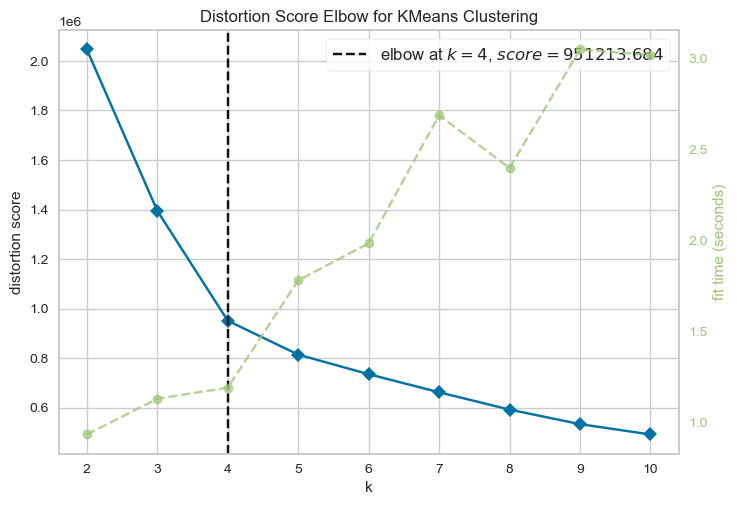

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# print('Elbow Method to determine the number of clusters to be formed:')
# Elbow_M = KElbowVisualizer(KMeans(), k=10)
# Elbow_M.fit(PCA_df)
# Elbow_M.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering
k = 3
AC = KMeans(n_clusters=k,random_state=1)

yhat_AC = AC.fit_predict(df_x)


C:\Users\Fabrizio Ortega\.conda\envs\condaenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
cluster_df =pd.concat([pd.Series(yhat_AC,name='cluster') ,df_y],axis=1) 
cluster_df

,cluster,defects
0,2,0.0
1,2,0.0
2,2,0.0
3,2,0.0
4,0,1.0
...,...,...
169600,2,NaN
169601,2,NaN
169602,2,NaN
169603,2,NaN


In [48]:
cluster_df.groupby('cluster')['defects'].value_counts(normalize=True)

cluster  defects
0        0.0        0.517146
         1.0        0.482854
1        1.0        0.541805
         0.0        0.458195
2        0.0        0.864083
         1.0        0.135917
Name: proportion, dtype: float64

In [45]:
cluster_df.groupby('cluster')['defects'].value_counts(normalize=False)

cluster  defects
0        0.0        51201
         1.0         5455
1        1.0         6162
         0.0         3903
2        0.0        19768
         1.0         7808
3        0.0         3827
         1.0         3639
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import OneHotEncoder

df[['c'+str(i)for i in range(k)]] = OneHotEncoder(sparse_output=False).fit_transform(cluster_df[['cluster']])
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,defects,opnd_per_op,prone_v,no_comments,branch_pctg,complexity,c0,c1,c2,c3
0,-0.762128,-0.677167,-0.529509,-0.464250,-0.625300,-0.623516,0.156043,-0.434193,-0.736341,-0.523321,...,0.0,1.227735,-0.373626,0.631053,-0.295689,-0.628915,0.0,1.0,0.0,0.0
1,-0.383283,-0.908430,-0.529509,-0.871413,-0.162542,-0.232488,-0.080353,-0.229976,0.127496,-0.409388,...,0.0,-0.108799,-0.373626,-1.584654,-0.358048,-0.852918,0.0,1.0,0.0,0.0
2,-0.142200,0.016623,0.893092,-0.057088,0.105370,0.053238,-0.553146,0.424310,0.061937,-0.106301,...,0.0,0.385020,-0.373626,-1.584654,-0.259748,0.267099,0.0,0.0,1.0,0.0
3,-0.899889,-0.677167,-0.529509,-0.871413,-0.710545,-0.695970,1.101629,-0.775215,-0.541592,-0.552666,...,0.0,0.551009,-0.373626,0.631053,-0.239781,-0.740916,0.0,1.0,0.0,0.0
4,0.236645,-0.214640,-0.529509,-0.871413,-0.990636,-0.876993,-1.262335,-1.270886,-1.667023,-0.578137,...,1.0,-2.832619,-0.373626,0.631053,1.577239,-0.516913,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169600,0.271086,-0.908430,-0.529509,-0.871413,0.531595,0.480214,-0.434947,0.116993,1.393043,-0.077144,...,NaN,0.720190,-0.373626,0.631053,-0.370816,-0.852918,0.0,0.0,1.0,0.0
169601,-0.452164,-0.445903,-0.529509,-0.057088,-0.527878,-0.543309,0.510638,-0.601730,-0.170734,-0.516421,...,NaN,0.128055,-0.373626,0.631053,-0.292195,-0.404911,0.0,1.0,0.0,0.0
169602,-0.314402,-0.677167,-0.529509,-0.464250,-0.357388,-0.380870,0.037845,-0.378678,0.047154,-0.452486,...,NaN,-0.528094,-0.373626,0.631053,-0.335413,-0.628915,0.0,1.0,0.0,0.0
169603,-0.521045,-0.677167,-0.529509,-0.871413,-0.393921,-0.429159,0.037845,-0.345963,-0.123171,-0.454912,...,NaN,0.641239,-0.373626,0.631053,-0.315042,-0.740916,0.0,1.0,0.0,0.0
